In [ ]:
using CUDA
using Plots
using Statistics

N = 2 .^ (8:12)  # creating a N using powers of 2, while 
TimeG = zeros(Float64, length(N))
TimeC = zeros(Float64, length(N))
num_trials = 10

for i in eachindex(N)
    timesG = Float64[]
    timesC = Float64[]
    for _ in 1:num_trials
        a = N[i]

        x_2dG = CUDA.randn(Float64, a, a)
        y_2dG = CUDA.randn(Float64, a, a)

        x_2dC = randn(Float64, a, a)  
        y_2dC = randn(Float64, a, a)  


        
        append!(timesG, @elapsed CUDA.@sync x_2dG.* y_2dG)
        append!(timesC,@elapsed x_2dC* y_2dC)

        #output = @benchmark CUDA@sync
        #min_time = minimum(output.times)
        #avg_time = mean(output.times)
    end
    TimeG[i] = mean(timesG)
    TimeC[i] = mean(timesC)
end


In [ ]:

p = plot(N, TimeG, title="Time vs Vector Size In Matirces Multiplication", xaxis=:log, yaxis=:log, label="GPU", marker=:circle, legend=:topright)
p2 = plot!(N,TimeC, title="Time vs Vector Size In Matirces Multiplication", xaxis=:log, yaxis=:log, label="CPU", marker=:circle, legend=:topright)

In [ ]:
using CUDA
using BenchmarkTools
x_2d = CUDA.randn(Float64, 2^8, 2^8)  
y_2d = CUDA.randn(Float64, 2^8, 2^8)  
@benchmark x_2d .* y_2d samples = 3

In [ ]:
using CUDA
using BenchmarkTools
x_2d = CUDA.randn(Float64, 2^8, 2^8)  
y_2d = CUDA.randn(Float64, 2^8, 2^8)  
@benchmark x_2d * y_2d samples = 3

[0.000204, 0.0011233, 0.0075152, 0.058985]


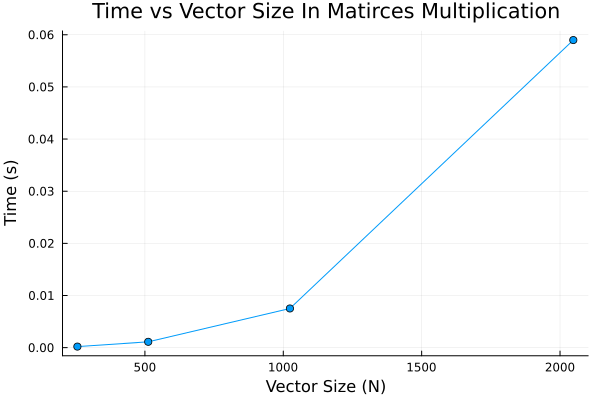

In [3]:
using CUDA
using Plots
using Statistics
using BenchmarkTools

N = 2 .^ (8:11) 
Time = zeros(Float64, length(N))

for i in eachindex(N)
    a = N[i]
    x_2d = CUDA.randn(Float64, a, a)  
    y_2d = CUDA.randn(Float64, a, a)

    result = @belapsed CUDA.@sync($x_2d * $y_2d) samples=3 #no need to use nested loop like  num_trials
    Time[i] = result 
end

println(Time)
plot(N, Time, title="Time vs Vector Size In Matirces Multiplication", xlabel="Vector Size (N)", ylabel="Time (s)",legend=false, marker=:circle)

(i, a) = (1, 256)
(i, a) = (2, 512)
(i, a) = (3, 1024)
(i, a) = (4, 2048)
(i, a) = (5, 4096)
(i, a) = (6, 8192)
(i, a) = (1, 256)
(i, a) = (2, 512)
(i, a) = (3, 1024)
(i, a) = (4, 2048)
(i, a) = (5, 4096)
(i, a) = (6, 8192)


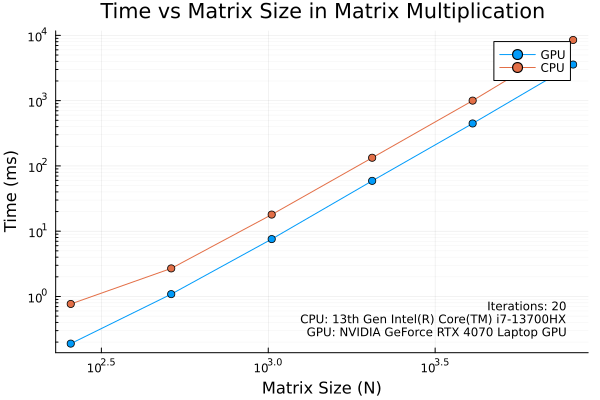

In [4]:
using CUDA
using Plots
using BenchmarkTools
using LinearAlgebra

#Matrix Multiplication

function TestGPU(N, C)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = CUDA.randn(Float64, a, a)  
        Y = CUDA.randn(Float64, a, a)       
        data = @benchmark CUDA.@sync $X*$Y
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds

    end

    return Time

end

function TestCPU(N, C)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = randn(Float64, a, a)  
        Y = randn(Float64, a, a)       
        data = @benchmark $X*$Y
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds
    end

    return Time

end


N = 2 .^ (8:13)
C = 20
timesGPU = TestGPU(N, C)
timesCPU = TestCPU(N, C)

#---------------------------------------------------------------------------------------#
x_pos = maximum(N) * 0.95  # Adjust to position the text within the plot area
y_pos = minimum(timesGPU) * 1.05  # Adjust based on the minimum time value


cpu_info = Sys.cpu_info()[1].model # display device name
gpu_info = CUDA.name(CUDA.device()) # display device name
#---------------------------------------------------------------------------------------#

p1 = plot(N, timesGPU, title="Time vs Matrix Size in Matrix Multiplication", xlabel="Matrix Size (N)", xaxis=:log, ylabel="Time (ms)", yaxis=:log, label="GPU", marker=:circle, legend=:topright, grid=:on, minorgrid=true)
plot!(p1, N, timesCPU, label="CPU", marker=:circle)
annotate!(p1, [(x_pos, y_pos, text("Iterations: $C\nCPU: $cpu_info\nGPU: $gpu_info", 8, :right, :bottom))])


(i, a) = (1, 256)
(i, a) = (2, 512)
(i, a) = (3, 1024)
(i, a) = (4, 2048)
(i, a) = (5, 4096)
(i, a) = (6, 8192)
(i, a) = (1, 256)
(i, a) = (2, 512)
(i, a) = (3, 1024)
(i, a) = (4, 2048)
(i, a) = (5, 4096)
(i, a) = (6, 8192)


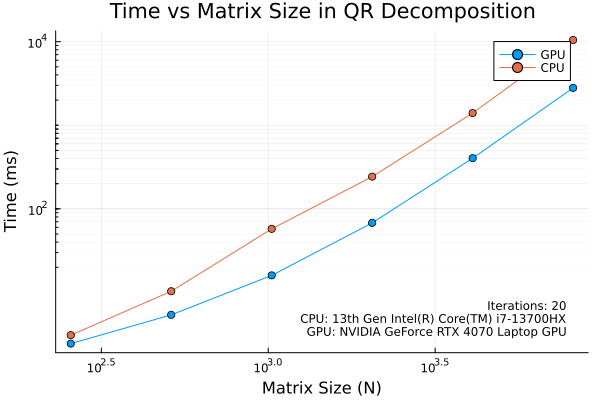

In [6]:
using CUDA
using Plots
using BenchmarkTools
using LinearAlgebra


# QR 

function TestGPU(N, C)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = CUDA.randn(Float64, a, a)         
        data = @benchmark CUDA.@sync qr($X)
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds

    end

    return Time

end

function TestCPU(N, C)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = randn(Float64, a, a)        
        data = @benchmark qr($X)
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds
    end

    return Time

end


N = 2 .^ (8:13)
C = 20
timesGPU = TestGPU(N, C)
timesCPU = TestCPU(N, C)

#---------------------------------------------------------------------------------------#
x_pos = maximum(N) * 0.95  # Adjust to position the text within the plot area
y_pos = minimum(timesGPU) * 1.05  # Adjust based on the minimum time value


cpu_info = Sys.cpu_info()[1].model # display device name
gpu_info = CUDA.name(CUDA.device()) # display device name
#---------------------------------------------------------------------------------------#

p1 = plot(N, timesGPU, title="Time vs Matrix Size in QR Decomposition", xlabel="Matrix Size (N)", xaxis=:log, ylabel="Time (ms)", yaxis=:log, label="GPU", marker=:circle, legend=:topright, grid=:on, minorgrid=true)
plot!(p1, N, timesCPU, label="CPU", marker=:circle)
annotate!(p1, [(x_pos, y_pos, text("Iterations: $C\nCPU: $cpu_info\nGPU: $gpu_info", 8, :right, :bottom))])


(i, a) = (1, 256)
(i, a) = (2, 512)
(i, a) = (3, 1024)
(i, a) = (4, 2048)
(i, a) = (5, 4096)
(i, a) = (6, 8192)
(i, a) = (1, 256)
(i, a) = (2, 512)
(i, a) = (3, 1024)
(i, a) = (4, 2048)
(i, a) = (5, 4096)
(i, a) = (6, 8192)


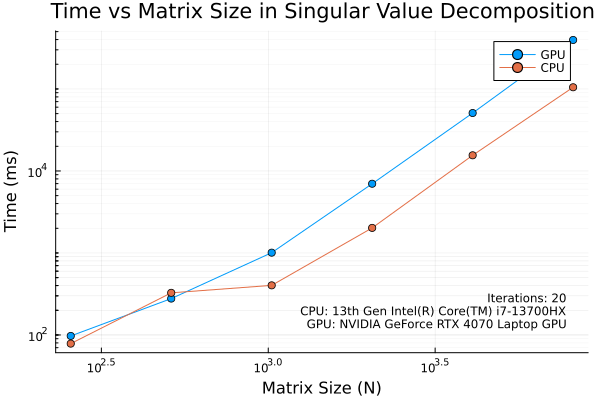

In [1]:
using CUDA
using Plots
using BenchmarkTools
using LinearAlgebra

# SVD

function TestGPU(N, C)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = CUDA.randn(Float64, a, a)         
        data = @benchmark CUDA.@sync svd($X)
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds

    end

    return Time

end

function TestCPU(N, C)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = randn(Float64, a, a)        
        data = @benchmark svd($X)
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds
    end

    return Time

end


N = 2 .^ (8:13)
C = 20
timesGPU = TestGPU(N, C)
timesCPU = TestCPU(N, C)

#---------------------------------------------------------------------------------------#
x_pos = maximum(N) * 0.95  # Adjust to position the text within the plot area
y_pos = minimum(timesGPU) * 1.05  # Adjust based on the minimum time value


cpu_info = Sys.cpu_info()[1].model # display device name
gpu_info = CUDA.name(CUDA.device()) # display device name
#---------------------------------------------------------------------------------------#

p1 = plot(N, timesGPU, title="Time vs Matrix Size in Singular Value Decomposition", xlabel="Matrix Size (N)", xaxis=:log, ylabel="Time (ms)", yaxis=:log, label="GPU", marker=:circle, legend=:topright, grid=:on, minorgrid=true)
plot!(p1, N, timesCPU, label="CPU", marker=:circle)
annotate!(p1, [(x_pos, y_pos, text("Iterations: $C\nCPU: $cpu_info\nGPU: $gpu_info", 8, :right, :bottom))])

(i, a) = (1, 256)
(i, a) = (2, 512)
(i, a) = (3, 1024)
(i, a) = (4, 2048)
(i, a) = (5, 4096)
(i, a) = (6, 8192)
(i, a) = (1, 256)
(i, a) = (2, 512)
(i, a) = (3, 1024)
(i, a) = (4, 2048)
(i, a) = (5, 4096)
(i, a) = (6, 8192)


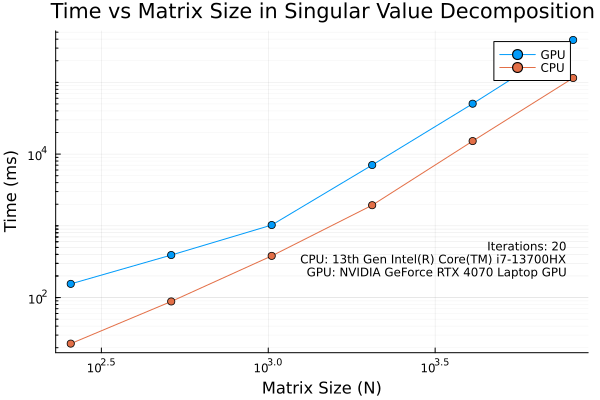

In [1]:
using CUDA
using Plots
using BenchmarkTools
using LinearAlgebra

# SVD

function TestGPU(N, C)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = CUDA.randn(Float64, a, a)         
        data = @benchmark CUDA.@sync svd($X)
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds

    end

    return Time

end

function TestCPU(N, C)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = randn(Float64, a, a)        
        data = @benchmark svd($X)
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds
    end

    return Time

end


N = 2 .^ (8:13)
C = 20
timesGPU = TestGPU(N, C)
timesCPU = TestCPU(N, C)

#---------------------------------------------------------------------------------------#
x_pos = maximum(N) * 0.95  # Adjust to position the text within the plot area
y_pos = minimum(timesGPU) * 1.05  # Adjust based on the minimum time value


cpu_info = Sys.cpu_info()[1].model # display device name
gpu_info = CUDA.name(CUDA.device()) # display device name
#---------------------------------------------------------------------------------------#

p1 = plot(N, timesGPU, title="Time vs Matrix Size in Singular Value Decomposition", xlabel="Matrix Size (N)", xaxis=:log, ylabel="Time (ms)", yaxis=:log, label="GPU", marker=:circle, legend=:topright, grid=:on, minorgrid=true)
plot!(p1, N, timesCPU, label="CPU", marker=:circle)
annotate!(p1, [(x_pos, y_pos, text("Iterations: $C\nCPU: $cpu_info\nGPU: $gpu_info", 8, :right, :bottom))])

To make a func intake: 

In [7]:
using CUDA
using Plots
using BenchmarkTools
using LinearAlgebra


function TestGPU(N, C, func)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = CUDA.randn(Float64, a, a)  
        Y = CUDA.randn(Float64, a, a)       
        data = @benchmark CUDA.@sync func($X, $Y)
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds

    end

    return Time

end

function TestCPU(N, C, func)
    
    Time = zeros(Float64, length(N))

    BenchmarkTools.DEFAULT_PARAMETERS.samples = C

    for (i,a) in enumerate(N)
        @show (i,a)
        X = randn(Float64, a, a)  
        Y = randn(Float64, a, a)       
        data = @benchmark func($X, $Y)
        Time[i] = mean(data.times) / 1e6  # Convert to milliseconds
    end

    return Time

end


N = 2 .^ (8:11)
C = 1

function Product(X, Y) 
    return X * Y
end

timesGPU = TestGPU(N, C, Product)
timesCPU = TestCPU(N, C, Product)

#---------------------------------------------------------------------------------------#
x_pos = maximum(N) * 0.95  # Adjust to position the text within the plot area
y_pos = minimum(timesGPU) * 1.05  # Adjust based on the minimum time value


cpu_info = Sys.cpu_info()[1].model # display device name
gpu_info = CUDA.name(CUDA.device()) # display device name
#---------------------------------------------------------------------------------------#

p1 = plot(N, timesGPU, title="Time vs Matrix Size in Matrix Multiplication", xlabel="Matrix Size (N)", xaxis=:log, ylabel="Time (ms)", yaxis=:log, label="GPU", marker=:circle, legend=:topright, grid=:on, minorgrid=true)
plot!(p1, N, timesCPU, label="CPU", marker=:circle)
annotate!(p1, [(x_pos, y_pos, text("CPU: $cpu_info\nGPU: $gpu_info", 8, :right, :bottom))])

LoadError: MethodError: no method matching Product()

[0mClosest candidates are:
[0m  Product([91m::Any[39m, [91m::Any[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[7]:48[24m[39m
